<a href="https://colab.research.google.com/github/ami-ace/IITB-Summer-Project-Stuff/blob/main/Assignment-1/Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2.1 Multiwavelength Cutouts



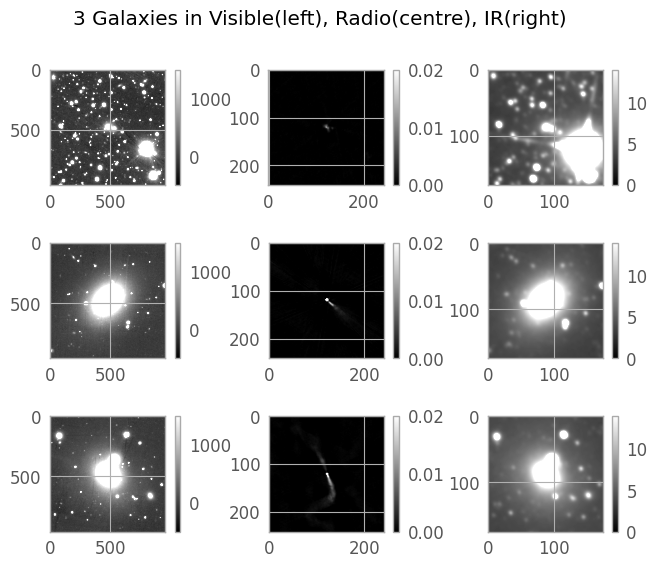

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

#Plotting parameters for 3 cutouts
vmin_pvw=[-500,0,0]
vmax_pvw=[1500,2E-2,14]

#Galaxies
Gal_1=[(0,'PanSTARRS_1.fits'),(1,'VLASS_1.fits'),(2,'WISE_1.fits')]
Gal_2=[(0,'PanSTARRS_2.fits'),(1,'VLASS_2.fits'),(2,'WISE_2.fits')]
Gal_3=[(0,'PanSTARRS_3.fits'),(1,'VLASS_3.fits'),(2,'WISE_3.fits')]

Gals=[Gal_1, Gal_2, Gal_3]
figCount=0

for Gal in Gals:
  for (i,fl) in Gal:
    image_file = get_pkg_data_filename(fl)
    image_data = fits.getdata(image_file, ext=0)
    figCount+=1
    plt.subplot(3,3,figCount)
    plt.imshow(image_data.squeeze(),cmap='gray',vmin=vmin_pvw[i], vmax=vmax_pvw[i])
    plt.suptitle('3 Galaxies in Visible(left), Radio(centre), IR(right)')
    plt.colorbar()         

## Observations:

1) 2MASX J00112171+5231437: Galaxy centre seems to be a radio lobe. Radio relic, source of synchrotron emission. <br>
2) NGC 0315: Appears elliptical from cutout in visible region. Gas jet only in one direction. Radio emission seems to be coming only from the centre and penetrates well through the surrounding medium.<br>
3) NGC 0383: Radio source at the centre of the galaxy(supermassive black hole) ejects molecular gas jets suggesting an Active Galactic Nucleus.

# 2.2 To see or not to See

Latitude = $19 ° $N<br>
1. Alt(NP) $≈-19°$<br>
Az(NP)$=0°$<br>
2. Alt(transit, equator)$≈ 90-(19-0)=71°$
3. Az(setting, equator)=$270 °$
4. No object with declination $<71 °$ can ever be observed.
5. Alt(transit, −23d 22m 53.3s)$\approx 90°-(23.3814+19)°≈47.6185°$

# 2.3 Jet Afterglow Lightcurve of GW170817

Plot of flux density versus time as per data from VLA in the 3 GHz band.

In [80]:
from astropy.io import ascii

gw170817 = ascii.read('gw170817_afterglow_data_full.txt')
gw170817

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-18.10,0.57,VLA,9700000000.0,<144,--
2017-Aug-18.1,0.6,Swift,2.41e+17,<7.8e-3,--
2017-Aug-18.21,0.68,ATCA,8500000000.0,<120,--
2017-Aug-18.21,0.68,ATCA,10500000000.0,<150,--
2017-Aug-18.2,0.7,NuSTAR,1.2e+18,<7.3e-4,--
2017-Aug-18.46,0.93,uGMRT,610000000.0,<195,--
2017-Aug-18.5,1.0,Swift,2.41e+17,<7.5e-2,--
2017-Aug-18.6,1.1,Swift,2.41e+17,<5.0e-3,--
2017-Aug-18.95,1.43,ALMA,339000000000.0,<126,--


In [81]:
from logging import warning
import numpy as np

freq_subset=gw170817['Freq']==3000000000
telescope_subset=gw170817['Telescope']=='VLA'
properflux_subset=[]

#Remove data with uncertain Flux Densities
for i in range(215):
  try:
    gw170817['FluxD'][i]=float(gw170817['FluxD'][i])
    properflux_subset.append(True)
    gw170817['T'][i]=float(gw170817['T'][i])
  except:
    properflux_subset.append(False)
    continue

properflux_subset=np.array(properflux_subset)
subset=np.logical_and(freq_subset, telescope_subset)
subset2=np.logical_and(subset, properflux_subset)

filtered_table=gw170817[subset2]
Flux_D=filtered_table['FluxD'].astype(float)
print(filtered_table)

         DateUT            T    Telescope     Freq     FluxD FluxDErr
------------------------ ------ --------- ------------ ----- --------
            2017-Sep-2.9   16.4       VLA 3000000000.0  18.7      6.3
            2017-Sep-3.9   17.4       VLA 3000000000.0  15.1      3.9
            2017-Sep-4.9   18.3       VLA 3000000000.0  14.5      3.7
            2017-Sep-8.9   22.4       VLA 3000000000.0  22.5      3.4
           2017-Sep-10.8   24.2       VLA 3000000000.0  25.6      2.9
           2017-Sep-17.8   31.3       VLA 3000000000.0  34.0      3.6
            2017-Oct-2.8   46.3       VLA 3000000000.0  44.0      4.0
           2017-Oct-10.8   54.3       VLA 3000000000.0  48.0      6.0
           2017-Oct-13.7   57.2       VLA 3000000000.0  61.0      9.0
           2017-Nov-18.6   93.1       VLA 3000000000.0  70.0      5.7
             2017-Dec-10  115.0       VLA 3000000000.0  96.2      8.0
             2018-Jan-27  163.0       VLA 3000000000.0  97.3     11.3
              2018-M

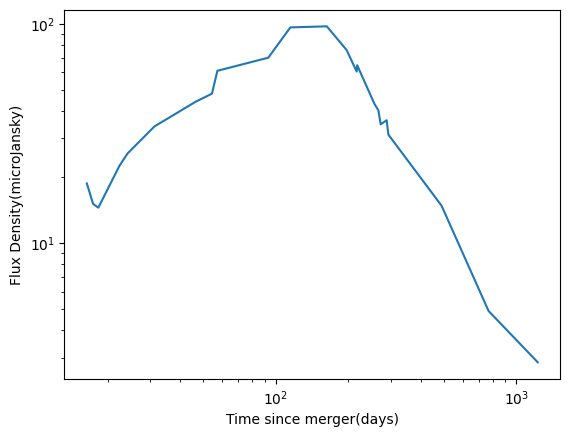

In [82]:
import matplotlib.pyplot as plt

plt.loglog(np.array(filtered_table['T']),Flux_D)
plt.xlabel('Time since merger(days)')
plt.ylabel('Flux Density(microJansky)')
plt.show()